In [1]:
# Daniel Bandala @ apr 2022
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Principal Component Analysis for Data Compression
PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The $i-th$ principal component can be taken as a direction orthogonal to the first $i-1$ principal components that maximizes the variance of the projected data.

Principal Component Analysis is one of the most famous data compression technique that is used for unsupervised data compression. PCA helps us to identify the patterns in the dataset based on the correlation between them. Or simply, it is a technique for feature extraction that combines our input variables in such a way that we can drop the least important ones while retaining the important information in the dataset. PCA finds the direction of the maximum variance and projects the data into lower dimensions. The principal components of the new subspace can be interpreted as the direction of maximum variance given the constraint that the new feature axes are orthogonal to each other.

In [2]:
# read data into pandas dataframe
img_path = "dog.jpg"
img = cv.imread(img_path,cv.IMREAD_GRAYSCALE)

Image shape:  (695, 980)


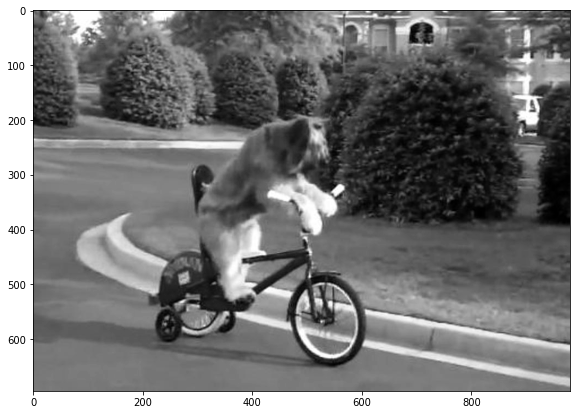

In [3]:
# show imgage
print("Image shape: ",img.shape)
plt.figure(figsize=(14,7))
plt.imshow(img,cmap='gray')

In [4]:
# step 1: normilize data
img_norm = (img-img.mean())/img.var()
# step 2: calculate covariance matrix
cov_matrix = np.cov(img_norm)
# step 3: estimate eigen values and vectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
# step 4: sort eigen values in descending order
sorting_idxs = np.flip(eigen_values.argsort())
eigen_values = eigen_values[sorting_idxs]
eigen_vectors = eigen_vectors[sorting_idxs]
# normalize eigen value
eigen_values_norm = eigen_values/np.sum(eigen_values)

Eigen values:  695


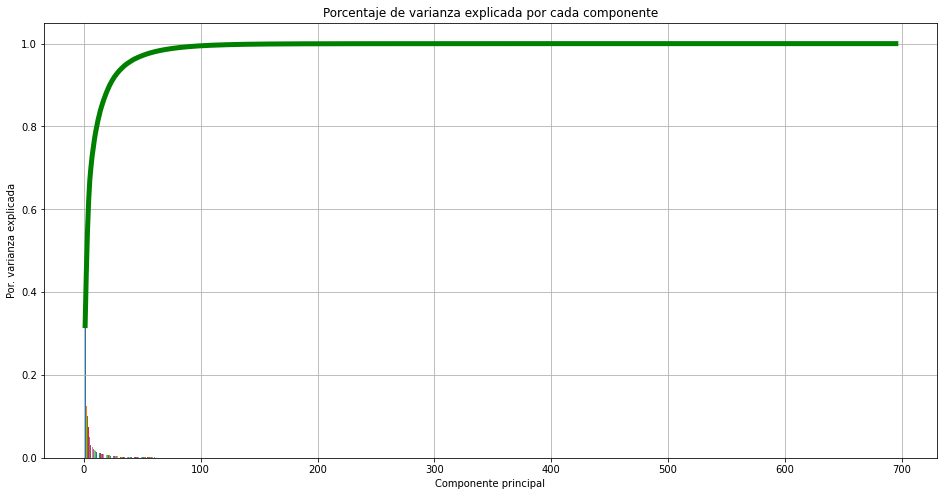

In [5]:
cumulative = 0
cumu_points = []
print("Eigen values: ",len(eigen_values))
plt.figure(figsize=(16,8))
for i in range(len(eigen_values_norm)):
    plt.bar(i+1,eigen_values_norm[i])
    cumulative = cumulative+eigen_values_norm[i]
    cumu_points.append(cumulative)
plt.plot(np.linspace(1,len(eigen_values_norm),len(eigen_values_norm)), cumu_points, 'g-', linewidth=5)
plt.title('Porcentaje de varianza explicada por cada componente')
plt.xlabel('Componente principal')
plt.ylabel('Por. varianza explicada');
plt.grid()

Image shape:  (695, 980)


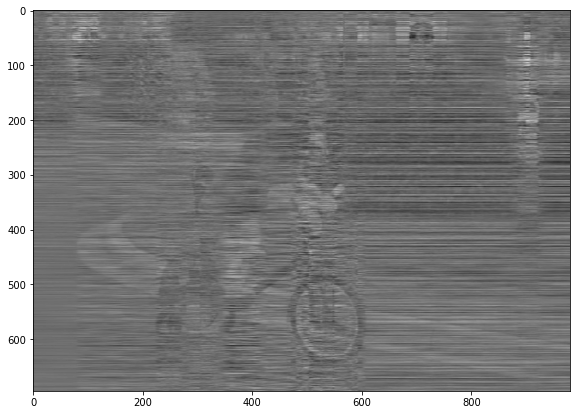

In [12]:
# step 5-6: select first k eigen vectors and construct projection matrix
k = 100
W = np.array([eigen_vectors[i] for i in range(min(len(eigen_values),k))])
# step 7: calculate new data projected on principal components space
I_proy = np.dot(W,img_norm)
I_approx = np.dot(W.T,I_proy)
# show compressed image
print("Image shape: ",img.shape)
plt.figure(figsize=(14,7))
plt.imshow(I_approx,cmap='gray')

Image shape:  (695, 980)


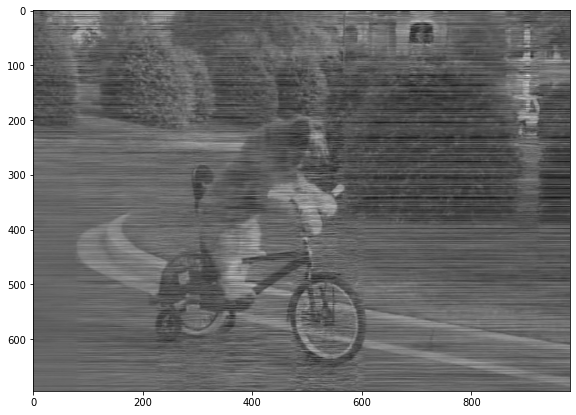

In [13]:
# step 5-6: select first k eigen vectors and construct projection matrix
k = 400
W = np.array([eigen_vectors[i] for i in range(min(len(eigen_values),k))])
# step 7: calculate new data projected on principal components space
I_proy = np.dot(W,img_norm)
I_approx = np.dot(W.T,I_proy)
# show compressed image
print("Image shape: ",img.shape)
plt.figure(figsize=(14,7))
plt.imshow(I_approx,cmap='gray')